In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [47]:
n_pts = 500
centers = [[-1, 1], [-1, -1], [1,-1], [1,1], [0,0]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
print(X,y)

[[ 0.95219249  1.39076863]
 [ 1.65952714  1.68618744]
 [-0.473863    0.05839169]
 [-1.41959667  0.96995176]
 [ 1.05997353 -0.78014296]
 [-1.60724319 -1.18447497]
 [-0.82564969 -1.1275828 ]
 [-0.11680167 -0.0467727 ]
 [ 0.72626083 -0.10110012]
 [ 0.42796744 -0.36373081]
 [ 1.08583443  0.83913611]
 [ 1.38965297 -0.93588251]
 [-1.58604649 -0.85462178]
 [-0.44909701  0.94272961]
 [ 1.40572155 -1.68359671]
 [-0.71461074 -0.0609578 ]
 [ 0.63020037  0.13222531]
 [ 0.74338976  0.0234151 ]
 [ 1.02112227  0.35169921]
 [-1.40786203  1.06717692]
 [ 0.73537974  0.62811535]
 [-0.53991778  0.49305918]
 [ 1.16554523  1.01893675]
 [-0.19294613  0.43191854]
 [-1.16056577 -0.73060349]
 [ 0.67184979  0.7509346 ]
 [-0.25482897 -0.6659765 ]
 [-0.8742912   0.46949382]
 [ 0.57943063  0.35688003]
 [ 1.16644953 -1.05312047]
 [ 0.82413112  1.43528819]
 [-1.15029996 -1.55188999]
 [-1.50155227  0.7448994 ]
 [ 0.27281391  0.11862263]
 [-1.03947388 -1.08599322]
 [-0.59490438  1.11149634]
 [-0.48077467 -0.18831422]
 

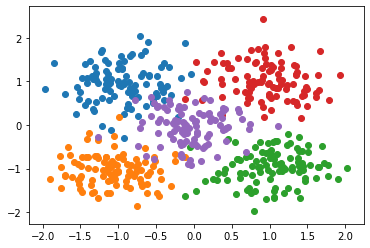

In [48]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

In [49]:
y_cat = to_categorical(y)
print(y_cat)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [50]:
model = Sequential()
model.add(Dense(units=5, input_shape=(2,), activation='softmax'))
adam = Adam(lr = 0.1)
model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=X, y=y_cat, verbose=1, batch_size=50, epochs=100, shuffle='true')

Epoch 1/100
500/500 [==============================] - 1s 1ms/step - loss: 1.7570 - accuracy: 0.2540
Epoch 2/100
500/500 [==============================] - 0s 48us/step - loss: 0.8035 - accuracy: 0.8040
Epoch 3/100
500/500 [==============================] - 0s 43us/step - loss: 0.5009 - accuracy: 0.8940
Epoch 4/100
500/500 [==============================] - 0s 57us/step - loss: 0.3879 - accuracy: 0.9200
Epoch 5/100
500/500 [==============================] - 0s 81us/step - loss: 0.3278 - accuracy: 0.9420
Epoch 6/100
500/500 [==============================] - 0s 60us/step - loss: 0.2978 - accuracy: 0.9440
Epoch 7/100
500/500 [==============================] - 0s 56us/step - loss: 0.2746 - accuracy: 0.9480
Epoch 8/100
500/500 [==============================] - 0s 58us/step - loss: 0.2598 - accuracy: 0.9400
Epoch 9/100
500/500 [==============================] - 0s 42us/step - loss: 0.2466 - accuracy: 0.9460
Epoch 10/100
500/500 [==============================] - 0s 58us/step - loss: 0.2356

500/500 [==============================] - 0s 58us/step - loss: 0.1523 - accuracy: 0.9520
Epoch 80/100
500/500 [==============================] - 0s 41us/step - loss: 0.1527 - accuracy: 0.9520
Epoch 81/100
500/500 [==============================] - 0s 42us/step - loss: 0.1526 - accuracy: 0.9500
Epoch 82/100
500/500 [==============================] - 0s 37us/step - loss: 0.1533 - accuracy: 0.9480
Epoch 83/100
500/500 [==============================] - 0s 41us/step - loss: 0.1542 - accuracy: 0.9500
Epoch 84/100
500/500 [==============================] - 0s 53us/step - loss: 0.1526 - accuracy: 0.9480
Epoch 85/100
500/500 [==============================] - 0s 51us/step - loss: 0.1525 - accuracy: 0.9480
Epoch 86/100
500/500 [==============================] - 0s 45us/step - loss: 0.1520 - accuracy: 0.9520
Epoch 87/100
500/500 [==============================] - 0s 50us/step - loss: 0.1520 - accuracy: 0.9500
Epoch 88/100
500/500 [==============================] - 0s 60us/step - loss: 0.1521 - 

In [51]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,0]) + 1)
    
#     print(y_span
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
#     print(xx)
#     print(yy)
    grid = np.c_[xx_, yy_]
    pred_func = model.predict_classes(grid)  # specifically for multiple classes
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

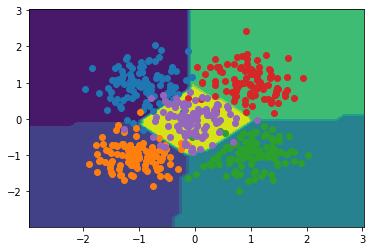

In [52]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

Prediction is:  [3]


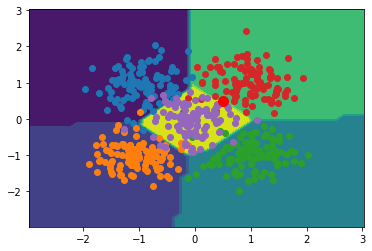

In [53]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
x = 0.5
y = 0.5
point = np.array([[x , y]])
prediction = model.predict_classes(point)
plt.plot([x],[y], marker='o', markersize=10, color="red")
print("Prediction is: ", prediction)